Project Name - <i>**How to Judge a Book by Its Cover**</i> <br>
Group 11 - <i> **Authors of Analysis** </i> <br>
Members - <i>Aditi Ketan Patel, Gunjan Sharma, Kristina Sutliff, Shashank Vidyadhar Patil, Urshilah Senthilnathan, Vatsal Srivastava</i><br>
Date - 11/11/2022

# 1. Project Overview

## Introduction

The Global book market is expected to reach $142.33 Billion by the end of 2022. Amazon has been a dominant player in this industry. One of the reasons for this dominance is the insights about bibliophiles that they gather through vital subsidiaries like Goodreads and Audible. 
    
Goodreads is a subsidiary of Amazon that provides book recommendations, along with other services, to its users. Members of Goodreads can keep track of the books they have read, are currently reading, and want to read in the future. The website also allows its users to connect with friends so that they can see what books their friends are reading. Additionally, the website consists of interviews with various authors where they talk about recently published books as well as promote their upcoming books. What makes Goodreads useful is that their lists of recommendations change dynamically over time so that the user always has access to the most relevant recommendations that match their preferences. 

As a group of consultants hired by Amazon to explore new revenue generating business opportunities, we will analyze Goodreads data to research focus areas that can be utilized to their full potential. The answers to following questions will aid Amazon in making critical business decisions and leveraging benefits of Goodreads.

## Questions of Research

1. On the basis of existing data which books can be converted into audio books?
2. Based on previous books performances within a series, how likely is the reader to continue reading the next book in the series?
3. Among the popular genres, what are the best performing books for these genres ranked according to book score? Book score is a metric that will be based on rating, review and awards related data to rank a book. 
4. Is there any correlation between Number of Pages and Average Rating? Is there a tendency to reduce the number of pages in recent books?


# 2. Milestones and Progress
Below table describes the tasks and their progress in accordance to the project proposal. 

| Task | Expectations Met | Comments/Remarks | Date |
| --- | --- | --- | --- |
| Research Data Scraping techniques and the Python libraries used for it | **Yes** | We researched about web scraping and finalized **BeautifulSoup** and **Selenium** libraries to extract the latest Books data from Goodreads web pages. However, after examining the license and communicating with Goodreads, we did not get the permission to scrape data for this project. Hence, we needed to drop the idea of using the acquired data through web scraping | 21 Oct |
| Perform Data Scraping to extract primary Book Attributes  | **Yes** | The data which we scraped included the name of the books, authors, publication date, number of pages per book, average rating of a book and number of reviews. Nonetheless, as stated above we won't be using this data. | 25 Oct |
| Explore Kaggle dataset that contains more comprehensive data | **Yes** | The dataset consists of book ID assigned by GoodReads, the title of the book, name of the series of which the book is part of, ISBN, author, awards, page count, rating count, review count, average rating, count of 5-star to 1-star rating of a book,original title of the book, date published, description and the plot setting of the book. Also, if a book is part of a series, the subsequent book IDs are available as well.The data set has been fetched from the kaggle website -https://www.kaggle.com/datasets/austinreese/goodreads-books?select=goodreads_books.csv | 25 Oct |
| Explore the possibility of merging kaggle data with scraped data based on Book ISBN and Book Name  | **Yes** | Since we are not allowed to mine any data from the website, we are directly using the data set fetched from kaggle for our project. | 25 Oct |
| Define scope of the analysis within the context of gathered Goodreads data | **Yes** | The underlying Analysis will help us understand how Amazon can leverage most benefit out of Goodreads, identify the focus areas that are crucial for our analysis that will help us answer our research questions.| 30 Oct |
| Identify variables of significance for our analysis  | **Yes** | Identified the variables of most significance such as Genre, Average Rating, Series , Review Count | 1 Nov |
| Identify the required text processing and cleaning techniques | **Yes** | Identified the variables that needed to be split in order to simplify the information present in them. Used techniques like split, contains, extract and regex to achieve the same | 1 Nov |
| Perform text processing to clean or segregate the data | **Yes** | Determined what proportion of observations contain missing values and how can they be handled | 4 Nov |
| Numerical Data Processing and Cleaning/ Imputing | **Yes** | Converted Rating and Review related columns to numerical format in order to prepare them for further analysis | 4 Nov |
| Recheck if the prepared data is clean and fit for analysis | **Yes** | Validated if the data is clean | 5 Nov |
| Analysis of Books that are part of a Series | **Yes** | We  have analyzed the series column to extract series name and the book number in that series and also explored some very basic statistics about such books | 10 Nov |
| Analysis of Book Popularity | **No** | We are researching about how to come up with a more efficient Book Score that will provide a better ranking of books by taking into account variables like awards and review counts | 10 Nov |

## Future Plan

We will be starting with the next phase of our project which is in-depth analysis. The plan includes:
- Identifying the apt data visualization libraries which will be the best way to display and explain our inferences.
- Researching more about Amazon's book business through blogs and articles by experts in order to expand on our analysis and derive more meaningful insights

We have identified the research questions and the pitfalls, we know where to start with our questions but there is still some uncertainty in the following aspects of the project:
 - Models that will be used for building the recommendation system. So we are currently working on identifying the best model for our project. 
 - Parameters that can be used to calculate the book score in order to rank book in a better way 

# 3. Data Acquisition and Cleaning Code
**Kaggle Dataset**:<br>
As stated above due to scraping permission issues, we are primarily using the Kaggle dataset for this analysis - https://www.kaggle.com/datasets/austinreese/goodreads-books?select=goodreads_books.csv

The data contains listing of all details of Goodreads book till 2021. Overall the data has the following columns: 
- Book Id
- Book Title
- Goodreads Link
- Series
- Cover Link
- Author
- Author Link
- Rating Count
- Review Count
- Average Rating
- Five Star Ratings
- Four Star Ratings
- Three Star Ratings
- Two Star Ratings
- One Star Ratings
- Number of Pages
- Date Publisher
- Publisher
- Original Title
- Genre and Votes
- ISBN
- ISBN13
- ASIN
- Settings
- Characters
- Awards
- Amazon Redirect Link
- Worldcat Redirect Link
- Recommended Books
- Books in Series 
- Description

**Data Volume**:<br>
52199 rows, 31 columns

In [144]:
#Importing the libraries
import numpy as np
import pandas as pd
import re 
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import *
import ipywidgets as widgets
from ipywidgets import *
import plotly.express as px
import plotly.graph_objects as go

## Reading the Data

In [145]:
# Loading the dataset file into dataframe
df_goodreads = pd.read_csv('../goodreads_books.csv')
df_goodreads.shape

(52199, 31)

In [146]:
# Getting rid of columns that are irrelevant for our analysis 
df_goodreads.drop(columns=['settings', 'amazon_redirect_link', 'worldcat_redirect_link', 
                           'recommended_books', 'books_in_series', 'description', 'asin',
                           'link', 'author_link', 'cover_link','original_title'], inplace=True)

## Identifying and setting Index
Out of the potential columns that can be considered for indexing the data; ISBN, ISBN13, Title and Book ID are some of them. We will identify the most suitable column that can uniquely identify a book and its details. 

In [147]:
# Determining duplicates for title column 
print('\n Duplicates in Book Title ->',df_goodreads['title'].duplicated().sum())

# Determining observations that don't have ISBN and ISBN13
isbn_mask = df_goodreads['isbn'].isnull() & df_goodreads['isbn13'].isnull()
print("\n Number of observation that don't have either ISBN or ISBN13 ->", isbn_mask.sum())

# Validating if all the books have unique Book IDs
print('\n Unique Book IDs ->',len(df_goodreads['id'].unique()))


 Duplicates in Book Title -> 2514

 Number of observation that don't have either ISBN or ISBN13 -> 11883

 Unique Book IDs -> 52199


We observe from above results, Book Title and ISBN cannot be used to uniquely identify a book as there are duplicates and missing values in them respectively. Hence, we identify Book ID to be the most suitable column to index the data.

In [148]:
# Setting index as book_id since it is unique for each observation
df_goodreads.set_index('id')

,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,date_published,publisher,genre_and_votes,isbn,isbn13,characters,awards
id,,,,,,,,,,,,,,,,,,,
630104,Inner Circle,(Private #5),"Kate Brian, Julian Peploe",7597,196,4.03,3045,2323,1748,389,92,220.0,January 1st 2007,Simon Schuster Books for Young Readers,"Young Adult 161, Mystery 45, Romance 32",1416950419,9781416950417,NaN,NaN
9487,A Time to Embrace,(Timeless Love #2),Karen Kingsbury,4179,177,4.35,2255,1290,518,93,23,400.0,October 29th 2006,Thomas Nelson,"Christian Fiction 114, Christian 45, Fiction 3...",1595542329,9781595542328,NaN,NaN
6050894,Take Two,(Above the Line #2),Karen Kingsbury,6288,218,4.23,3000,2020,1041,183,44,320.0,January 1st 2009,Zondervan,"Christian Fiction 174, Christian 81, Fiction 58",NaN,NaN,NaN,NaN
39030,Reliquary,(Pendergast #2),"Douglas Preston, Lincoln Child",38382,1424,4.01,12711,15407,8511,1429,324,464.0,1997,Tor Books,"Thriller 626, Mystery 493, Horror 432, Fiction...",0765354950,9780765354952,"Aloysius X.L. Pendergast, Margo Green, William...",NaN
998,The Millionaire Next Door: The Surprising Secr...,NaN,"Thomas J. Stanley, William D. Danko",72168,3217,4.04,27594,25219,14855,3414,1086,258.0,October 28th 1995,Gallery Books,"Economics-Finance 1162, Nonfiction 910, Busine...",0671015206,9780671015206,NaN,Independent Publisher Book Award (IPPY) Nomine...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15743072,The Stranger I Married,NaN,Sylvia Day,13295,805,3.87,4220,4733,3116,848,378,312.0,2007,Kensington Trade,"Romance-Historical Romance 335, Romance 312, H...",075829039X,9780758290397,"Gerard Faulkner, Isabel Pelham",NaN
18143905,The Opposite of Loneliness: Essays and Stories,NaN,Marina Keegan,42609,4282,3.84,12461,15191,11202,3011,744,208.0,April 8th 2014,Scribner,"Nonfiction 1307, Short Stories 766, Writing-Es...",147675361X,9781476753614,NaN,"Goodreads Choice Award for Nonfiction (2014), ..."
1466878,Sadako will leben,NaN,Karl Bruckner,1583,64,4.17,673,592,251,51,16,264.0,1961,Arena,"Fiction 13, Childrens 11, Historical-Historica...",3401027247,9783401027241,Sadako Sasaki,"Austrian National Prize (1961), City of Vienna..."


## Cleaning the Data
First, we will be analyzing the data to check if there are any columns that are not relevant to our research so that we can permanently drop them. Second, we will check there are any missing values in the columns of our interest, if found can we impute them or drop them. Third, identify columns that contain information that can be simplified to get straightforward data.

As seen above, ISBN columns are not relevant to our research hence we can drop them permanently.

In [149]:
# Dropping ISBN columns
df_goodreads.drop(columns=['isbn', 'isbn13'], inplace=True)

In [150]:
# Check if rating columns contain null values
df_goodreads[['rating_count', 'review_count','average_rating', 'five_star_ratings', 'four_star_ratings', 'three_star_ratings',
  'two_star_ratings', 'one_star_ratings']].isnull().sum()

rating_count          0
review_count          0
average_rating        0
five_star_ratings     0
four_star_ratings     0
three_star_ratings    0
two_star_ratings      0
one_star_ratings      0
dtype: int64

As seen above, there are no Books with a missing rating data.

Since many books are in different languages, their data contains random characters and needs to be removed. We can use the below following function to keep only english characters in the data. We are primarily interested in title, author, series and publisher columns.

In [151]:
# determining titles and authors that have non english characters by using below regex
non_english_chars = re.compile('^[^A-Za-z0-9_\-\'\"\(\)]')

# dropping the gathered observations
non_english_chars_index = df_goodreads[df_goodreads['title'].str.match(non_english_chars) 
                                       | df_goodreads['author'].str.match(non_english_chars)
                                       | df_goodreads['series'].str.match(non_english_chars)
                                       | df_goodreads['publisher'].str.match(non_english_chars)].index
df_goodreads.drop(non_english_chars_index, inplace=True)

In [152]:
# Determine Non Series Books which have missing Genre and Publication Date data
non_series_mask = ((df_goodreads['date_published'].isnull() | df_goodreads['genre_and_votes'].isnull()) & df_goodreads['series'].isnull())
non_series_mask.sum()

2604

Since there are Books that are not part of any Series that contain missing Publication Date and Genres we can delete these Books permanently and we won't be affecting any books that are a part of any series.

In [153]:
# Deleting the above gathered data with missing values
df_goodreads.drop(df_goodreads[non_series_mask].index, inplace=True)

Identifying books that are a part of Series which have missing Publication Date or Genre data.

In [154]:
# Determining books that are part of series but do not have the publication date and genre data
((df_goodreads['date_published'].isnull() | df_goodreads['genre_and_votes'].isnull()) & df_goodreads['series'].notnull()).sum()

529

To solve above issue and to simplify the data for further analysis, we can split the series column to extract series name and the book number in that series.

In [155]:
# Splitting series column based on # to retrieve required data
series_split = df_goodreads['series'].str.extract(pat='(\w+) #(\d+)')
series_split

,0,1
0,Private,5
1,Love,2
2,Line,2
3,Pendergast,2
4,NaN,NaN
...,...,...
52194,NaN,NaN
52195,NaN,NaN
52196,NaN,NaN
52197,Private,4


In [156]:
# Dropping the old series column
df_goodreads.drop(columns='series', inplace=True)

# Creating new series name and book number column to provide simplified data
df_goodreads['series_name'] = series_split[0]
df_goodreads['book_number_in_series'] = series_split[1]

Let us cross check if the Books in series have corresponding Book Number.

In [157]:
# check if book is series does not have book number
(df_goodreads['series_name'].notnull() & df_goodreads['book_number_in_series'].isnull()).sum()

0

For our analysis, let us extract the leading genre , i.e. the genre with the most votes and populate it in a new column. Also we extract only the year of publication as it is of interest from the date published column.

In [158]:
# Creating Main Genre column that can be used for further analysis`
df_goodreads['main_genre'] = df_goodreads['genre_and_votes'].str.split('\d').str[0].str.rstrip().str.replace('-',' ')

In [159]:
# Extracting year from date published 
df_goodreads['year_published'] = df_goodreads['date_published'].str.extract(pat='(\d{4})').values
df_goodreads['year_published'] = df_goodreads['year_published'].astype('Int64')

In [160]:
# Drop the old date published column which is no longer required.
df_goodreads.drop(columns='date_published', inplace=True)

We will be dividing the series of books into 4 categories to easily identify the group that it can be associated with. The categories are - <br>`Individual Book`, <br>`Duology` - Series having 2 books, <br> `Trilogy` - Series having 3 books, <br> `Multiple books` - Series having more than 3 books. <br>
**Note** - The books that have no series number information will be considered as individual books.

In [161]:
# Grouping the data by series name to check how many parts the series has
series_grouped = df_goodreads.sort_values(['average_rating'], ascending=False).groupby('series_name')['book_number_in_series'].first()
series_grouped = pd.DataFrame(series_grouped)

# Creating a map to categorize the series
category_map = {
    '1' : 'Individual book',
    '2' : 'Duology',
    '3' : 'Trilogy'
}
def categorize_series(item):
    if item in category_map:
        return category_map[item]
    else:
        return 'Multiple books'

# Applying function to map the categories and then merging with the final dataframe
series_grouped['series_category'] = series_grouped['book_number_in_series'].apply(categorize_series)
series_grouped.drop(columns='book_number_in_series', inplace=True)

df_goodreads = pd.merge(df_goodreads, series_grouped, how='left', left_on = 'series_name', right_on='series_name')
df_goodreads['series_category'].fillna('Individual book', inplace=True)

In [162]:
df_goodreads.head()

,id,title,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,...,number_of_pages,publisher,genre_and_votes,characters,awards,series_name,book_number_in_series,main_genre,year_published,series_category
0,630104,Inner Circle,"Kate Brian, Julian Peploe",7597,196,4.03,3045,2323,1748,389,...,220.0,Simon Schuster Books for Young Readers,"Young Adult 161, Mystery 45, Romance 32",NaN,NaN,Private,5,Young Adult,2007,Multiple books
1,9487,A Time to Embrace,Karen Kingsbury,4179,177,4.35,2255,1290,518,93,...,400.0,Thomas Nelson,"Christian Fiction 114, Christian 45, Fiction 3...",NaN,NaN,Love,2,Christian Fiction,2006,Multiple books
2,6050894,Take Two,Karen Kingsbury,6288,218,4.23,3000,2020,1041,183,...,320.0,Zondervan,"Christian Fiction 174, Christian 81, Fiction 58",NaN,NaN,Line,2,Christian Fiction,2009,Multiple books
3,39030,Reliquary,"Douglas Preston, Lincoln Child",38382,1424,4.01,12711,15407,8511,1429,...,464.0,Tor Books,"Thriller 626, Mystery 493, Horror 432, Fiction...","Aloysius X.L. Pendergast, Margo Green, William...",NaN,Pendergast,2,Thriller,1997,Trilogy
4,998,The Millionaire Next Door: The Surprising Secr...,"Thomas J. Stanley, William D. Danko",72168,3217,4.04,27594,25219,14855,3414,...,258.0,Gallery Books,"Economics-Finance 1162, Nonfiction 910, Busine...",NaN,Independent Publisher Book Award (IPPY) Nomine...,NaN,NaN,Economics Finance,1995,Individual book


## Analysis of Books that are part of series
We will start out with some basic exploratory data analysis of the data in hand to gather `top performing genres and books`.

We can perform some descriptive statistics analyze the performance of books that are part of a series in comparison to other books to gather some inferences.

In [163]:
# Filtering data based on if the book is in series or not
series_books = df_goodreads[df_goodreads['series_name'].notnull()]
not_series_books = df_goodreads[df_goodreads['series_name'].isnull()]
print('Books that are part of a Series ->',len(series_books))
print('Books that are part of a Series ->',len(not_series_books))

Books that are part of a Series -> 20799
Books that are part of a Series -> 26658


In [164]:
# Grouping the data according to series name and book id
series_books.set_index(['series_name', 'id'], inplace=True)

In [165]:
print('Number of people who rated the Series books ->', series_books['rating_count'].astype('Int64').mean().round(0))
print('Number of people who rated the Non Series books ->', not_series_books['rating_count'].astype('Int64').mean().round(0))

Number of people who rated the Series books -> 22169.0
Number of people who rated the Non Series books -> 19217.0


- The number of customers who rate a book that is a part of a series is higher than that of non series books. We can infer that customers tend to interact more with Goodreads if a book is part of series.

In [166]:
x_data = series_books['main_genre'].value_counts().head(10).index
y_data = series_books['main_genre'].value_counts().head(10).values

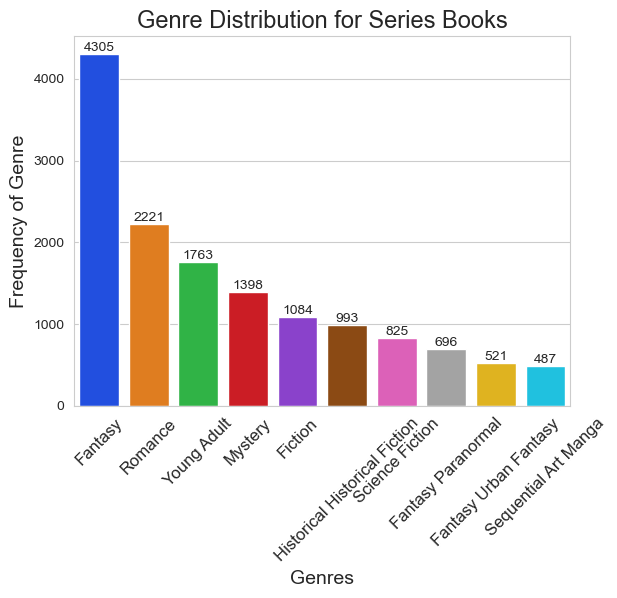

In [167]:
sns.set_style('whitegrid')
genre_distribution = sns.barplot(x=x_data, y=y_data, palette= 'bright')
genre_distribution.set_title('Genre Distribution for Series Books', fontsize=17)
genre_distribution.set_xlabel('Genres', fontsize=14)
genre_distribution.set_ylabel('Frequency of Genre', fontsize=14)
genre_distribution.set
genre_distribution.set_xticklabels(
    genre_distribution.get_xticklabels(),
    fontsize = 'large',
    rotation = 45)
genre_distribution.bar_label(genre_distribution.containers[0])

plt.show()

- As seen, books that are in series are most likely to be of Fantasy Genre, but does this mean that Authors should choose this genre as a promising one when writing a new book?

In [168]:
# Calculating mean of average rating of series books that have genre as 'Fantasy'
round(series_books[series_books['main_genre']=='Fantasy']['average_rating'].mean(),2)

4.06

In [169]:
# Calculating mean of average rating of series books that have genre as 'Sequential Art-Manga'
round(series_books[series_books['main_genre']=='Fantasy Urban Fantasy']['average_rating'].mean(),2)

4.02

Despite being the 10th highest occuring genre, it has a better rating than the most occuring Genre i.e. Fantasy. Hence, we cannot say that going with highest used Genre was always yield a quality book.

In [170]:
self_publishing_companies = ['self', 'self publish', 'selfpublish', 'pub yourself press', 'kindle', 'smashwords',
                             'barnes noble', 'kobo', 'lulu', 'apple book', 'amazon', 'montlake romance', 'Thomas & Mercer'
                            ,'47North', 'TOPPLE Books', 'new harvest']

amazon_encore_companies = ['amazon', 'montlake romance', 'Thomas & Mercer'
                            ,'47North', 'TOPPLE Books', 'new harvest', 'kindle']

self_published_books = df_goodreads[df_goodreads['publisher'].str.contains('|'.join(self_publishing_companies), case=False, na=False)]

Top 10 platforms authors use to self publish their books - https://selfpublishing.com/self-publishing-companies/
Amazon Encore- Amazon's book publishing unit 

In [171]:
len(self_published_books)

681

In [172]:
self_published_books['publisher'].str.contains('|'.join(amazon_encore_companies), case=False).sum()/ len(self_published_books)

0.55359765051395

In [173]:
genre_grouped = df_goodreads.groupby('main_genre').agg({'main_genre':'count'})
genre_grouped = genre_grouped.rename(columns={'main_genre':'count'}).sort_values('count', ascending=False).head(30)

In [174]:
df_goodreads.columns

Index(['id', 'title', 'author', 'rating_count', 'review_count',
       'average_rating', 'five_star_ratings', 'four_star_ratings',
       'three_star_ratings', 'two_star_ratings', 'one_star_ratings',
       'number_of_pages', 'publisher', 'genre_and_votes', 'characters',
       'awards', 'series_name', 'book_number_in_series', 'main_genre',
       'year_published', 'series_category'],
      dtype='object')

In [175]:
genre_dropdown = Dropdown(options = genre_grouped.index, 
                          description='Genre:')

series_category_dropdown = Dropdown(options = ['Most frequent category', 'All categories', 'Individual book', 'Duology', 'Trilogy', 'Multiple books'],
                                    style={'description_width': 'initial'}, 
                                    description='Series Category:', 
                                    value = 'Most frequent category')

In [180]:
def filter_data(genre_value, series_category_value, df):
    filtered_df = df[df['main_genre'] == genre_value]
    filtered_df = filtered_df[['title','year_published','average_rating','rating_count', 'review_count','series_category']]
    filtered_df = filtered_df[filtered_df['year_published'].notnull()]
    filtered_df = filtered_df[filtered_df['year_published'] > 2000]
    
    if series_category_value == 'Most frequent category':
        category = df_goodreads.groupby('series_category').agg({'id':'count'})
        category.sort_values(by='id', ascending=False, inplace=True)
        category = category.head(1).index.values[0]
        filtered_df = filtered_df[filtered_df['series_category'] == category]
    
    elif series_category_value == 'All categories':
        category = ['Individual book', 'Duology', 'Trilogy', 'Multiple books']
        filtered_df = filtered_df[filtered_df['series_category'].isin(category)]
        
    else:
        filtered_df = filtered_df[filtered_df['series_category'] == series_category_value]

    return filtered_df    


In [181]:
def display_chart(genre_value, series_category_value, df):
    df = filter_data(genre_value, series_category_value, df)
    size = df['review_count']

    fig = px.scatter(df, x="year_published", 
                     y="average_rating",
                     size='review_count',
                     color="series_category",
                     color_discrete_sequence=['#8b20c9','#f59953','#3344c4','#35b550'],
                     hover_name="title", log_x=True,
                     labels={"series_category": "Series Category"})

    fig.update_traces(mode='markers',
                      marker=dict(
                          size=size,
                          sizemode='area',
                          sizeref=2.*max(size)/(75.**2),
                          sizemin=4,
                          symbol='diamond', 
#                           'circle-dot', 'circle', 'circle-open'],
                          line_width=1))

    fig.update_layout(
        title='Books rating distribution according to series type',
        xaxis=dict(
            title='Publish Year',
            gridcolor='white',
            type='log',
            gridwidth=1,
        ),
        yaxis=dict(
            title='Average Rating',
            gridcolor='white',
            gridwidth=1,
        ),
        paper_bgcolor='rgb(243, 243, 243)',
        plot_bgcolor='rgb(243, 243, 243)',
    )
    fig.show()

In [182]:
display(genre_dropdown, series_category_dropdown)

Dropdown(description='Genre:', options=('Fiction', 'Fantasy', 'Romance', 'Young Adult', 'Nonfiction', 'Histori…

Dropdown(description='Series Category:', options=('Most frequent category', 'All categories', 'Individual book…

In [183]:
display_chart(genre_dropdown.value, series_category_dropdown.value, df_goodreads)

In [184]:
series_books = df_goodreads[df_goodreads['series_category'].isin(['Duology','Trilogy','Multiple books'])]
series_books = series_books.copy(deep=True)

first_in_series = series_books[series_books['book_number_in_series'] == '1']
first_in_series = first_in_series[['title','series_name','average_rating','rating_count']]
first_in_series.groupby('series_name')['average_rating'].first()

series_name
0           3.69
100         3.57
14          3.90
19          4.01
1945        4.11
            ... 
tica        4.50
trilogy     3.77
veria       4.27
xxxHOLiC    4.15
Î¹          4.09
Name: average_rating, Length: 1774, dtype: float64

In [185]:
other_books_in_series = df_goodreads[df_goodreads['book_number_in_series'] > '1']
other_books_in_series = other_books_in_series.copy(deep=True)
other_books_in_series.groupby('series_name').agg({'average_rating':'mean'})

,average_rating
series_name,
0,3.910000
1,3.200000
10,4.260000
100,3.760000
11,4.365000
...,...
xodo,4.130000
xxxHOLiC,4.314545
zebrane,4.000000


In [186]:
year_bins = np.linspace(start=1991, stop=2021, num=7)
df_goodreads['year_group'] = pd.cut(df_goodreads['year_published'], year_bins)
df_goodreads

,id,title,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,...,publisher,genre_and_votes,characters,awards,series_name,book_number_in_series,main_genre,year_published,series_category,year_group
0,630104,Inner Circle,"Kate Brian, Julian Peploe",7597,196,4.03,3045,2323,1748,389,...,Simon Schuster Books for Young Readers,"Young Adult 161, Mystery 45, Romance 32",NaN,NaN,Private,5,Young Adult,2007,Multiple books,"(2006.0, 2011.0]"
1,9487,A Time to Embrace,Karen Kingsbury,4179,177,4.35,2255,1290,518,93,...,Thomas Nelson,"Christian Fiction 114, Christian 45, Fiction 3...",NaN,NaN,Love,2,Christian Fiction,2006,Multiple books,"(2001.0, 2006.0]"
2,6050894,Take Two,Karen Kingsbury,6288,218,4.23,3000,2020,1041,183,...,Zondervan,"Christian Fiction 174, Christian 81, Fiction 58",NaN,NaN,Line,2,Christian Fiction,2009,Multiple books,"(2006.0, 2011.0]"
3,39030,Reliquary,"Douglas Preston, Lincoln Child",38382,1424,4.01,12711,15407,8511,1429,...,Tor Books,"Thriller 626, Mystery 493, Horror 432, Fiction...","Aloysius X.L. Pendergast, Margo Green, William...",NaN,Pendergast,2,Thriller,1997,Trilogy,"(1996.0, 2001.0]"
4,998,The Millionaire Next Door: The Surprising Secr...,"Thomas J. Stanley, William D. Danko",72168,3217,4.04,27594,25219,14855,3414,...,Gallery Books,"Economics-Finance 1162, Nonfiction 910, Busine...",NaN,Independent Publisher Book Award (IPPY) Nomine...,NaN,NaN,Economics Finance,1995,Individual book,"(1991.0, 1996.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47452,15743072,The Stranger I Married,Sylvia Day,13295,805,3.87,4220,4733,3116,848,...,Kensington Trade,"Romance-Historical Romance 335, Romance 312, H...","Gerard Faulkner, Isabel Pelham",NaN,NaN,NaN,Romance Historical Romance,2007,Individual book,"(2006.0, 2011.0]"
47453,18143905,The Opposite of Loneliness: Essays and Stories,Marina Keegan,42609,4282,3.84,12461,15191,11202,3011,...,Scribner,"Nonfiction 1307, Short Stories 766, Writing-Es...",NaN,"Goodreads Choice Award for Nonfiction (2014), ...",NaN,NaN,Nonfiction,2014,Individual book,"(2011.0, 2016.0]"
47454,1466878,Sadako will leben,Karl Bruckner,1583,64,4.17,673,592,251,51,...,Arena,"Fiction 13, Childrens 11, Historical-Historica...",Sadako Sasaki,"Austrian National Prize (1961), City of Vienna...",NaN,NaN,Fiction,1961,Individual book,NaN
47455,630103,Confessions,Kate Brian,8815,258,4.09,3760,2734,1780,435,...,Simon Schuster Books for Young Readers,"Young Adult 182, Mystery 52, Romance 34",NaN,NaN,Private,4,Young Adult,2007,Multiple books,"(2006.0, 2011.0]"


In [191]:
df_goodreads['year_group'].unique()

[(2006.0, 2011.0], (2001.0, 2006.0], (1996.0, 2001.0], (1991.0, 1996.0], NaN, (2011.0, 2016.0], (2016.0, 2021.0]]
Categories (6, interval[float64, right]): [(1991.0, 1996.0] < (1996.0, 2001.0] < (2001.0, 2006.0] < (2006.0, 2011.0] < (2011.0, 2016.0] < (2016.0, 2021.0]]

In [ ]:
# Creating graph for year wise percentage distribution to understand the trend
sns.lineplot(x= df_goodreads['year_group'], y=final_grouped_year['Percentage_of_restaurants'].values, 
             linewidth=2, color='#819FF7', marker="o")
plt.title('Year Wise Percentage of Restaurants having atleast one voilation', color='#B40431')
plt.xlabel('Year of Inspection')
plt.ylabel('Percentage of Restaurants (%)')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [193]:
import plotly.graph_objects as go

x = df_goodreads['year_group']

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x,
    y=df_goodreads['number_of_pages'],
    name = '<b>No</b> Gaps', # Style name/legend entry with html tags
    connectgaps=True # override default to connect the gaps
))

fig.show()

TypeError: Object of type Interval is not JSON serializable